# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [2]:
df_origin = pd.read_csv('customer_data.csv', sep='\t')  # 쉼표가 아닌 탭으로 데이터 구분됨.

In [3]:
df = df_origin

# 데이터 탐색 및 전처리

In [4]:
pd.set_option('display.max_columns', None)  # 컬럼 생략하지 않는 옵
df.head(3)

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11


In [5]:
df.shape

(2240, 23)

In [6]:
df.info() # annual_income 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [7]:
df.describe(include='all') # revenue값이 조금 이상하다.

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [8]:
object_columns = list(df.dtypes[df.dtypes == 'object'].index)
uniques = {}
for col in object_columns:
    uniques[col] = df[col].unique()
uniques

{'signup_ym': array(['2020-12', '2022-06', '2021-11', '2022-05', '2022-04', '2021-12',
        '2021-02', '2021-08', '2021-09', '2022-02', '2021-01', '2021-03',
        '2020-11', '2021-06', '2021-04', '2021-05', '2022-08', '2022-03',
        '2021-07', '2022-09', '2022-07', '2021-10', '2022-01', '2020-10'],
       dtype=object),
 'marital_status': array(['미혼', '배우자 있음', '이혼', '사별'], dtype=object)}

In [9]:
uniques['signup_ym'].sort()
print(uniques['signup_ym'])
print(f"총 등록일(연월) 개수 : {len(uniques['signup_ym'])}")
# 20년 10월부터 22년 9월까지의 총 24개의 데이터 (그 사이에 결측값은 없다.)

['2020-10' '2020-11' '2020-12' '2021-01' '2021-02' '2021-03' '2021-04'
 '2021-05' '2021-06' '2021-07' '2021-08' '2021-09' '2021-10' '2021-11'
 '2021-12' '2022-01' '2022-02' '2022-03' '2022-04' '2022-05' '2022-06'
 '2022-07' '2022-08' '2022-09']
총 등록일(연월) 개수 : 24


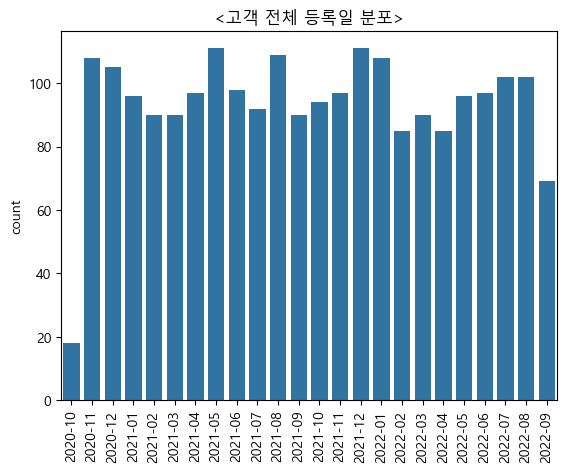

In [10]:
plt.rc('font', family='Malgun Gothic')

sns.countplot(data=df.sort_values('signup_ym'), x='signup_ym')
plt.xticks(rotation=90)
plt.title('<고객 전체 등록일 분포>')
plt.xlabel('')
plt.ylabel('count')

plt.show()

In [11]:
df['annual_income'].isnull().sum()
# annual_income 24개의 결측값 존재

24

In [12]:
# 결측값 있는 행 삭제
df = df.dropna()

In [13]:
df.isnull().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

In [14]:
df.duplicated(subset='ID').sum()  # ID는 중복값이 없다.

0

In [15]:
# 출생연도 생일로 바꾸기
df['birth_year'] = 2023 - df['birth_year'] # 기준 시점은 2023년으로 한다.
df = df.rename(columns={'birth_year': 'age'})
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_31964\3783978354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = 2023 - df['birth_year'] # 기준 시점은 2023년으로 한다.


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [16]:
# 구매 금액 합계, 구매 횟수 합계 구하기
amount_total = df[['amount_alcohol', 'amount_fruit', 'amount_meat',
                           'amount_fish', 'amount_snack', 'amount_general']].sum(axis=1)

In [17]:
index_amount_general = df.columns.get_loc('amount_general')

df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=amount_total,
)

In [18]:
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


In [19]:
num_purchase_total = df[['num_purchase_web', 'num_purchase_store', 'num_purchase_discount']].sum(axis=1)

index_num_purchase_discount = df.columns.get_loc('num_purchase_discount')

df.insert(
    loc=index_num_purchase_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total,
)

In [20]:
df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


In [21]:
# 'revenu' 컬럼은 무엇을 의미하는지 알 수 없다. 11이라는 숫자로 이루어져있다. 아마 없애도 될 것 같다
# 고객 ID는 분석에 필요하지 않다.
df = df.drop(columns=['ID', 'revenue'])
df.head()

,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


# Data Analysis

## 고객들의 연령, 소득, 가족 구성 등 인구통계학적 정보를 파악

### 고객 연령 파악

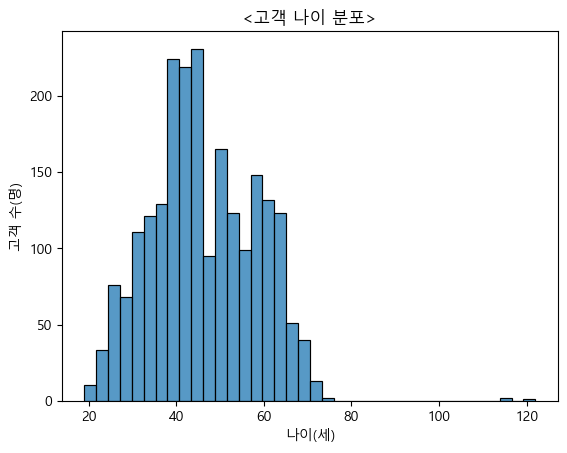

In [22]:
sns.histplot(data=df['age'])
plt.title('<고객 나이 분포>')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')
plt.show()

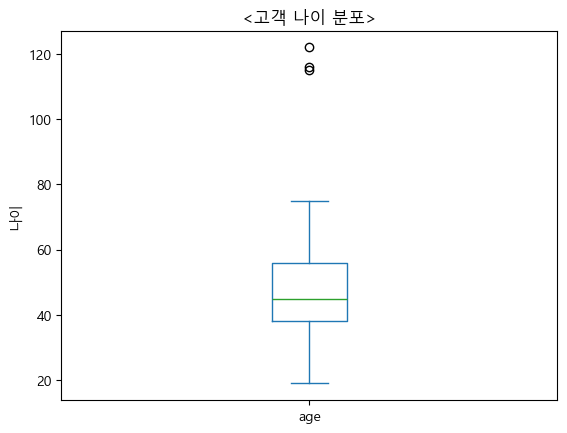

In [23]:
# 눈에 잘 보이게 박스 플롯으로 그려본다.
df['age'].plot(kind='box')
plt.title('<고객 나이 분포>')
plt.ylabel('나이')
plt.show()  # 100살이 넘어가는 사람을 제외하면 70대까지 존재한다.

In [24]:
# 100살이 넘어가는 나이는 분석 대상에서 제외
df = df[df['age'] < 100]

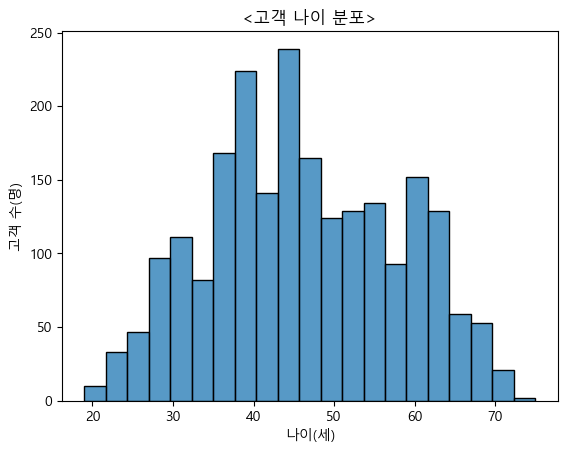

In [25]:
# 다시 히스토그램 그리기
sns.histplot(data=df['age'])
plt.title('<고객 나이 분포>')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')
plt.show()

In [26]:
# 나이를 연령대로 나눈다. (10대부터 70대까지 있)
age_bins = list(range(10, 81, 10))
print(age_bins)
age_labels = [f'{x}대' for x in age_bins[:-1]]
print(age_labels)
age_group = pd.cut(x=df['age'], bins=age_bins, labels=age_labels, right=False) # 각 구간별 끝값 미포함
age_group

[10, 20, 30, 40, 50, 60, 70, 80]
['10대', '20대', '30대', '40대', '50대', '60대', '70대']


0       50대
1       60대
2       50대
3       30대
4       30대
       ... 
2235    40대
2236    60대
2237    30대
2238    50대
2239    60대
Name: age, Length: 2213, dtype: category
Categories (7, object): ['10대' < '20대' < '30대' < '40대' < '50대' < '60대' < '70대']

In [27]:
# 데이터프레임에 열 삽입
df.insert(
    loc=df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)
df.head(3)

,signup_ym,age,age_group,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,58,50대,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,61,60대,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,50,50대,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0


In [28]:
df['age_group'].value_counts()

age_group
40대    678
30대    502
50대    485
60대    338
20대    185
70대     23
10대      2
Name: count, dtype: int64

In [29]:
# 10대와 70대는 너무 적어 10대와 20대를 20대 이하로 변경, 60대와 70대를 60대 이상으로 변경한다.
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
df['age_group'] = df['age_group'].replace(age_group_replace_dict)

C:\Users\user\AppData\Local\Temp\ipykernel_31964\577437863.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['age_group'] = df['age_group'].replace(age_group_replace_dict)


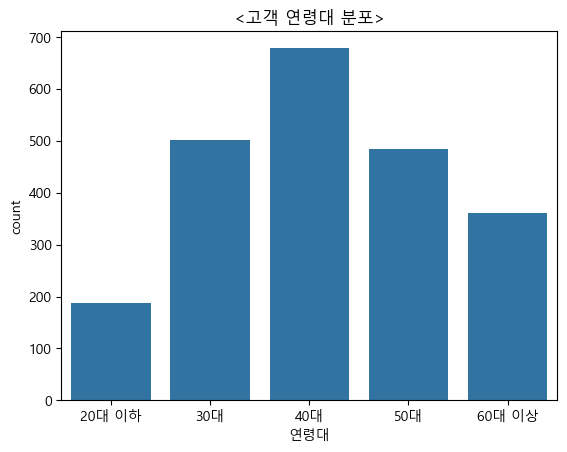

In [30]:
sns.countplot(data=df, x='age_group')
plt.title('<고객 연령대 분포>')
plt.xlabel('연령대')
plt.show()

### 연 소득 분포 파악

In [31]:
df['annual_income'] = df['annual_income']/1000000
# 연소득을 백만원 단위로 수정한다.

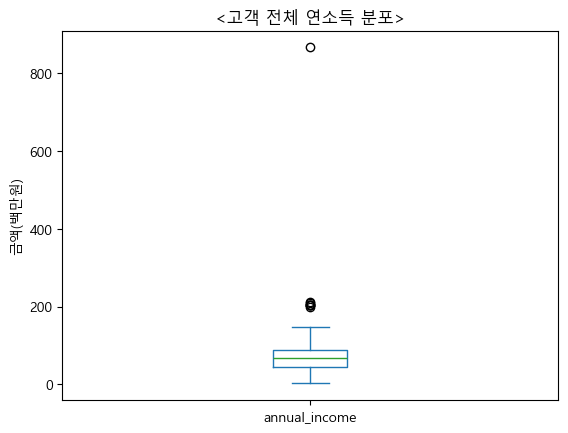

In [32]:
df['annual_income'].plot(kind='box')
plt.title("<고객 전체 연소득 분포>")
plt.ylabel("금액(백만원)")
plt.show()
# 8억이 넘는 연소득을 가진 사람이 하나 있다.
# 소득과 소비 사이의 관계를 분석할 때 왜곡이 발생할 수 있고, 연 소득이 이상 범위에 있는 고객의 수가 많지 않으니 그냥 제거한다.

In [33]:
income = df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

normal_condition = (lower_bound <= income) & (income <= upper_bound)
df = df[normal_condition]

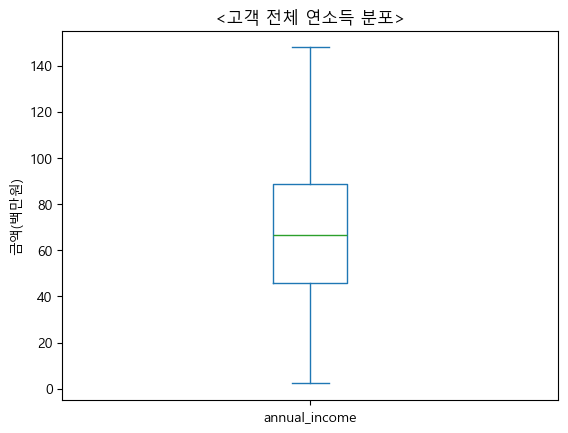

In [34]:
df['annual_income'].plot(kind='box')
plt.title("<고객 전체 연소득 분포>")
plt.ylabel("금액(백만원)")
plt.show()

### 고객 혼인 상태 및 가족 구성원 분포

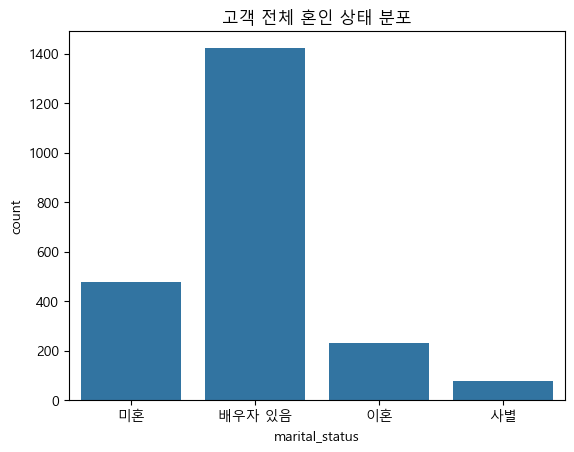

In [35]:
sns.countplot(data=df, x='marital_status')
plt.title("고객 전체 혼인 상태 분포")
plt.show()
# 기혼 상태인 사람이 제일 많다.

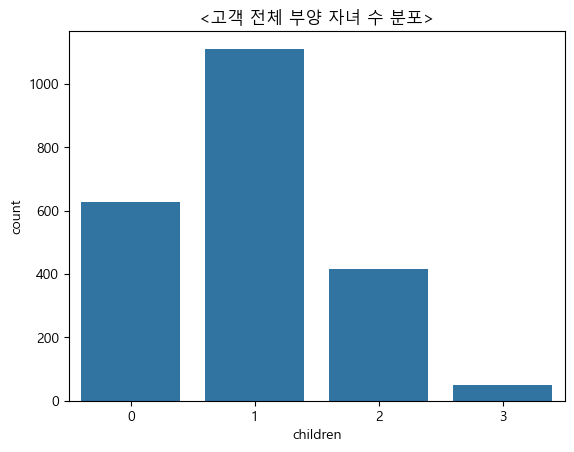

In [36]:
sns.countplot(data=df, x='children')
plt.title("<고객 전체 부양 자녀 수 분포>")
plt.show()
# 자녀가 한명 있거나 아예 없는 부류가 가장 많다.

In [37]:
# 가족 구성원 수 컬럼을 추가해본다.
df.loc[df['marital_status'] == '배우자 있음', 'spouse'] = 1
df.loc[df['marital_status'] != '배우자 있음', 'spouse'] = 0
df['family_size'] = df['spouse'] + df['children'] + 1 # 나 자신도 추가해야 됨
df['family_size'] = df['family_size'].astype(int)

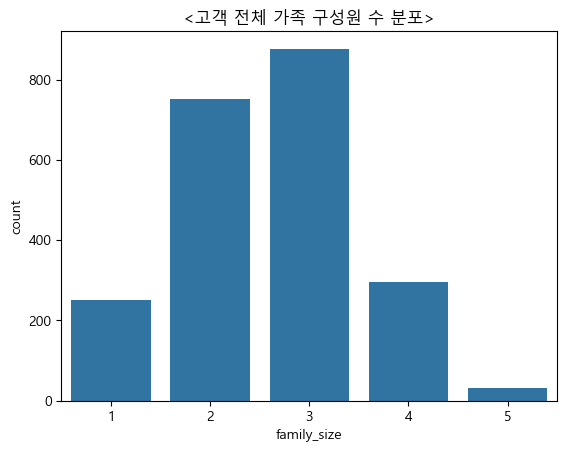

In [38]:
sns.countplot(data=df, x='family_size')
plt.title("<고객 전체 가족 구성원 수 분포>")
plt.show()
# 아마 배우자와 자식 한 명 이렇게 총 3명인 분포가 많을 것이다.

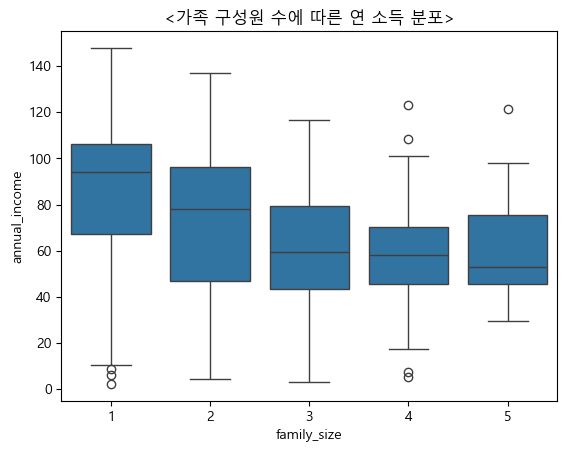

In [39]:
sns.boxplot(data=df, x='family_size', y='annual_income')
plt.title('<가족 구성원 수에 따른 연 소득 분포>')
plt.show()
# 1인가구의 소득 분포가 가장 넓게 분포해 있다.

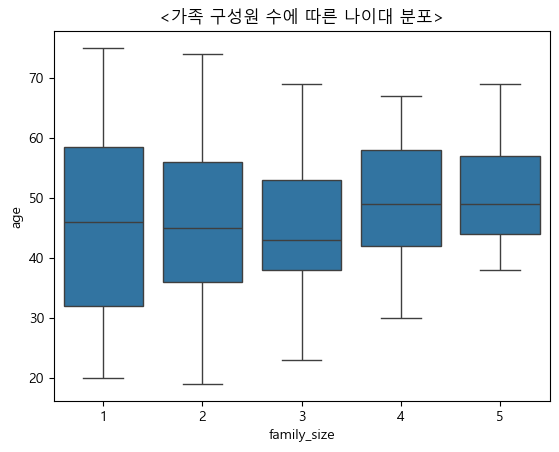

In [40]:
# 가족 구성원 수 별로 나이 대 분포를 본다.
sns.boxplot(data=df, x='family_size', y='age')
plt.title("<가족 구성원 수에 따른 나이대 분포>")
plt.show()
# 1인 가구는 나이대가 엄청 다양하지만 가족 구성원 수가 많아질수록 그 범위는 좁아지고 중앙값은 올라간다.

## RFM 분석 (고객 세그먼트 나누기)

### recency 등급 나누기

In [41]:
num_grades = 3
grade_labels = list(range(1, num_grades + 1))
grade_labels # 값이 클수록 긍정적이라고 가정

[1, 2, 3]

In [42]:
recency_grade = pd.qcut(x=df['recency'], q=num_grades, labels=grade_labels[::-1]) # recency는 값이 작은게 큰 등급을 가져야 한다.
df['recency_grade'] = recency_grade

In [43]:
df['recency_grade'].value_counts()

recency_grade
3    752
1    730
2    723
Name: count, dtype: int64

In [44]:
groupby_recency_grade = df.groupby('recency_grade', observed=True).sum(numeric_only=True).reset_index()
groupby_recency_grade

,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,spouse,family_size
0,3,34326,50592.1754,678,11988,293945600,26728000,157576900,37583000,25539800,42485300,583858600,3103,4386,1693,9182,54,12,67,55,60,179,488.0,1918
1,2,33737,48189.9535,724,35840,294073000,23675600,151742500,35046700,25147200,41268500,570953500,2992,4240,1771,9003,47,8,47,52,48,95,468.0,1915
2,1,33578,49192.6058,690,60237,289602300,25281100,164547500,35599200,27076400,42536000,584642500,2947,4215,1648,8810,41,10,49,57,53,59,466.0,1886


<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

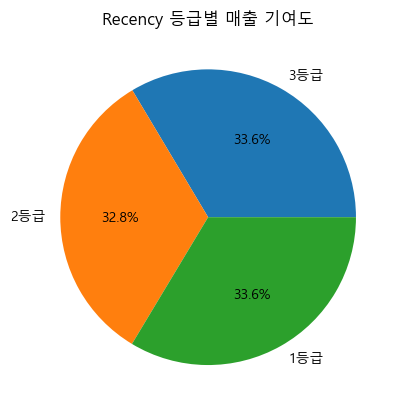

In [45]:
groupby_recency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    ylabel='',
)

### frequency 등급 나누기

In [46]:
df['frequency_grade'] = pd.qcut(x=df['num_purchase_total'], q=num_grades, labels=grade_labels)

In [47]:
df['frequency_grade'].value_counts() # 균등하게 나뉘지 못함 (unique한 값이 많지 않아서)

frequency_grade
1    851
2    679
3    675
Name: count, dtype: int64

In [48]:
groupby_frequency_grade = df.groupby('frequency_grade', observed=True).sum(numeric_only=True).reset_index()
groupby_frequency_grade

,frequency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,spouse,family_size
0,1,36992,38883.9334,989,41579,55630900,7387900,38834900,10792600,7022600,17867200,137536100,1477,2560,1365,5402,7,3,61,8,7,80,556.0,2396
1,2,31947,52681.1610,496,33525,342971200,32916000,220378600,47747700,33254000,50017500,727285000,2940,4021,1522,8483,69,14,54,69,87,130,422.0,1597
2,3,32702,56409.6403,607,32961,479018800,35380800,214653400,49688600,37486800,58405100,874633500,4625,6260,2225,13110,66,13,48,87,67,123,444.0,1726


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

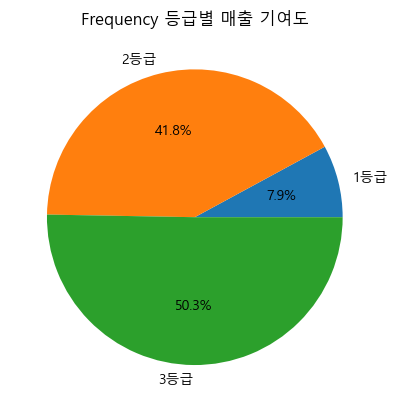

In [49]:
groupby_frequency_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Frequency 등급별 매출 기여도',
    ylabel='',
)

### Monetary 등급 나누기

In [50]:
df['monetary_grade'] = pd.qcut(x=df['amount_total'], q=num_grades, labels=grade_labels)

In [51]:
df['monetary_grade'].value_counts()

monetary_grade
1    735
2    735
3    735
Name: count, dtype: int64

<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

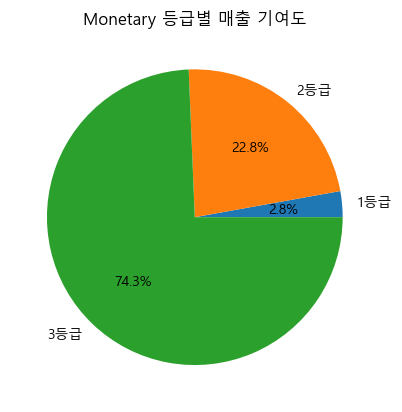

In [52]:
groupby_monetary_grade = df.groupby('monetary_grade', observed=True).sum(numeric_only=True).reset_index()
groupby_monetary_grade['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='Monetary 등급별 매출 기여도',
    ylabel='',
)

### 가중합 이용해서 RFM 구하기

#### rfm_score는 1이상 3이하의 값을 가진다. (2/3 크기의 동일한 구간으로 나눈다.)
- 1 이상 5/3 미만	 :  1등급
- 5/3 이상 7/3 이하	 :  2등급
- 7/3 초과 3 이하	 :  3등급

In [53]:
# 가중치 사전 정의
weight = {}
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

In [54]:
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')  # 범주형 데이터 타입이므로 int로 변환해줘야 한다.
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

In [55]:
# rfm_score 값을 받으면 위의 기준에 따라 RFM 세그먼트를 리턴
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

In [56]:
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

In [57]:
df['rfm_segment'].value_counts()

rfm_segment
1    802
3    792
2    611
Name: count, dtype: int64

<Axes: title={'center': 'RFM 고객 세그먼트별 매출 기여도'}>

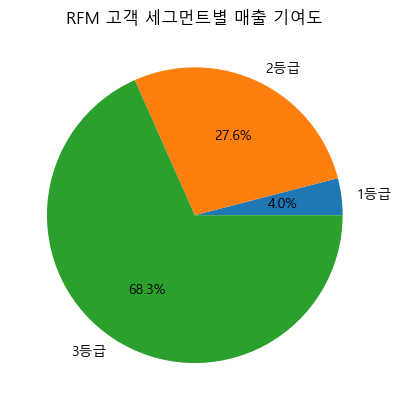

In [58]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    title='RFM 고객 세그먼트별 매출 기여도',
    ylabel='',
)

## 고객 세그먼트별 특성 파악

### 세그먼트별 연령 분포

In [59]:
groupby_rfm_segment_age_group = df.groupby(['rfm_segment', 'age_group'], observed=True).size().reset_index()
groupby_rfm_segment_age_group = groupby_rfm_segment_age_group.rename(columns={0: 'num_customers'})
groupby_rfm_segment_age_group

,rfm_segment,age_group,num_customers
0,1,20대 이하,84
1,1,30대,231
2,1,40대,268
3,1,50대,135
4,1,60대 이상,84
5,2,20대 이하,46
6,2,30대,121
7,2,40대,169
8,2,50대,161
9,2,60대 이상,114


In [60]:
def print_segment_pie_graph_by(group_df, col, title):

    plt.figure(figsize=(14, 6))
    
    for i, i_segment in enumerate(range(1, num_grades + 1), 1):
        group_dist = group_df[group_df['rfm_segment'] == i_segment]
        
        plt.subplot(1, 3, i)
        group_dist['num_customers'].plot(
            kind='pie',
            autopct='%.1f%%',
            labels=group_df[col].unique(),
            title=f'{i_segment}등급 세그먼트 ' + title,
            ylabel='',
        )

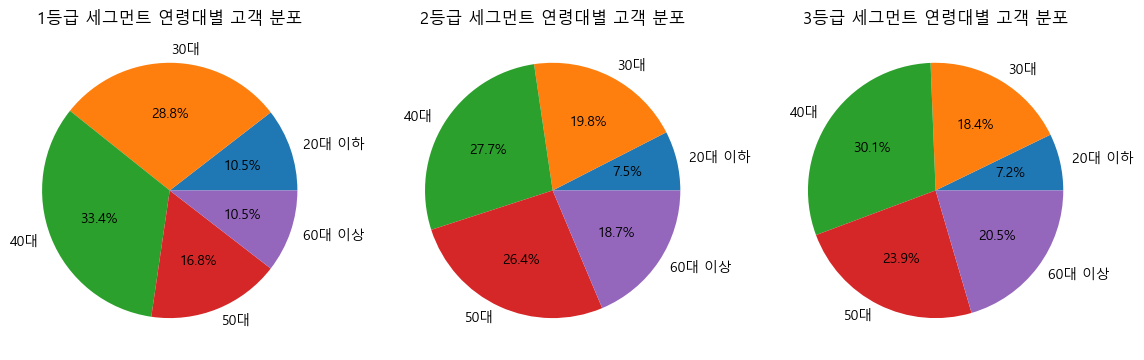

In [61]:
print_segment_pie_graph_by(groupby_rfm_segment_age_group, 'age_group', '연령대별 고객 분포')

### 세그먼트 별 혼인상태 분포

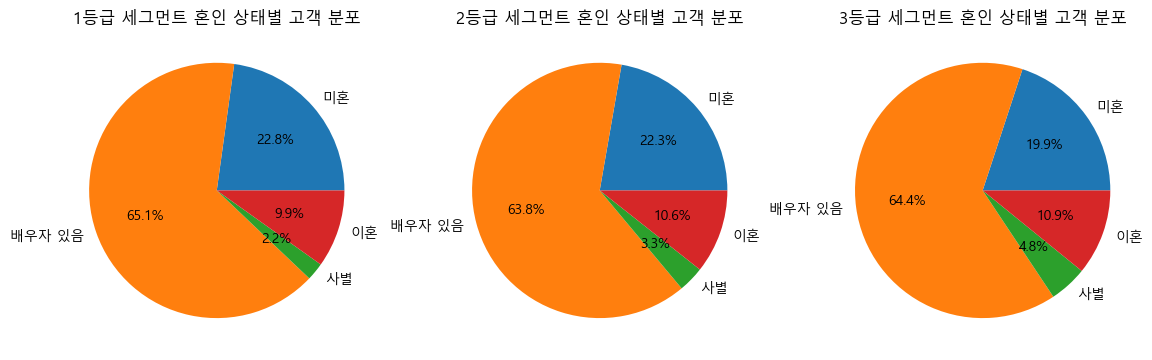

In [62]:
groupby_rfm_segment_marital = df.groupby(['rfm_segment', 'marital_status'], observed=True).size().reset_index()
groupby_rfm_segment_marital = groupby_rfm_segment_marital.rename(columns={0: 'num_customers'})
print_segment_pie_graph_by(groupby_rfm_segment_marital, 'marital_status', '혼인 상태별 고객 분포')
# 세그먼트 별로 비슷하다.

### 세그먼트 별 자녀 수 분포

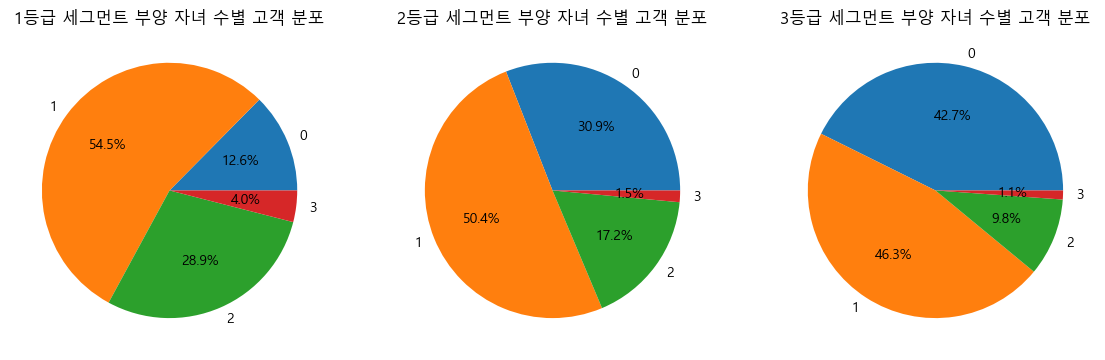

In [63]:
groupby_rfm_segment_children = df.groupby(['rfm_segment', 'children'], observed=True).size().reset_index()
groupby_rfm_segment_children = groupby_rfm_segment_children.rename(columns={0: 'num_customers'})
print_segment_pie_graph_by(groupby_rfm_segment_children, 'children', '부양 자녀 수별 고객 분포')
# 등급이 올라갈수록 자녀가 없다.

### 세그먼트별 소비 특성 파악

In [64]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

selected_columns = [
    col
    for col in groupby_rfm_segment.columns
    if col.startswith('amount_') and col != 'amount_total'
]
selected_columns.append('rfm_segment')
selected_columns

amount_sum_per_product = groupby_rfm_segment[selected_columns]
amount_sum_per_product = amount_sum_per_product.set_index('rfm_segment')
amount_sum_per_product

,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general
rfm_segment,,,,,,
1,26176800,4089800,16556800,6091800,4165200,13079300
2,231695100,22575800,133016000,31023200,22217000,39907400
3,619749000,49019100,324294100,71113900,51381200,73303100


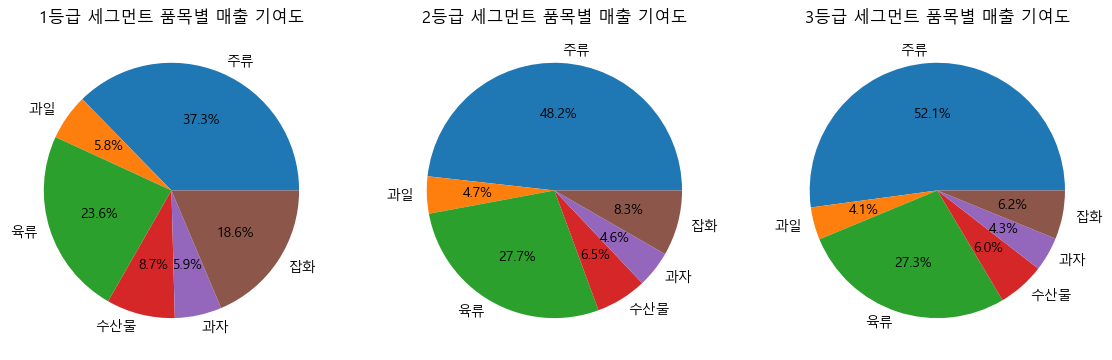

In [65]:
plt.figure(figsize=(14, 6))

for i, i_segment in enumerate(range(1, num_grades + 1), 1):
    plt.subplot(1, 3, i)
    amount_sum_per_product.loc[i_segment].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=['주류', '과일', '육류', '수산물', '과자', '잡화'],
        title=f'{i_segment}등급 세그먼트 품목별 매출 기여도',
        ylabel='',
    )
# 주류 소비는 늘고 과일, 과자 등 간식이나 잡화(생필품) 소비가 줄어드는 경향
# 자녀 수와도 관계가 있어보인다. (등급이 높아질수록 자녀 수가 적어진다.)

### 세그먼트별 프로모션 참여 여부 파악

In [66]:
groupby_rfm_segment = df.groupby(['rfm_segment']).mean(numeric_only=True).reset_index() # 프로모션 참여는 0과 1이므로 평균을 구하면 된다.

selected_columns = [f'promotion_{i}' for i in range(1, 7)]
selected_columns.append('rfm_segment')
selected_columns

avg_promotion = groupby_rfm_segment[selected_columns]
avg_promotion = avg_promotion.set_index('rfm_segment')
avg_promotion

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
rfm_segment,,,,,,
1,0.000000,0.002494,0.071072,0.006234,0.001247,0.074813
2,0.050736,0.009820,0.072013,0.078560,0.060556,0.127660
3,0.140152,0.027778,0.078283,0.140152,0.155303,0.246212


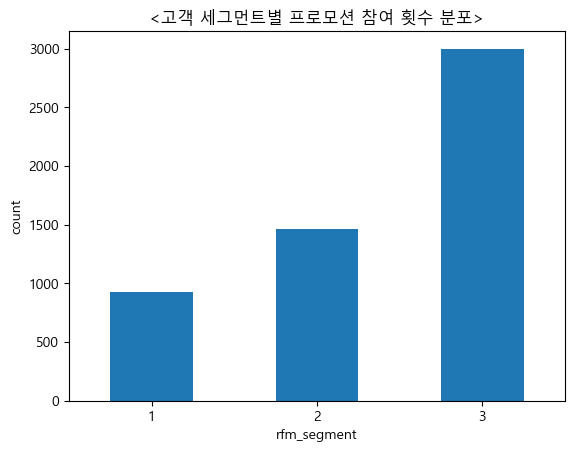

In [67]:
df['promotion_total'] = df[selected_columns].sum(axis=1)
temp = df.groupby('rfm_segment', observed=True)['promotion_total'].sum()
temp.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('count')
plt.title('<고객 세그먼트별 프로모션 참여 횟수 분포>')
plt.show()

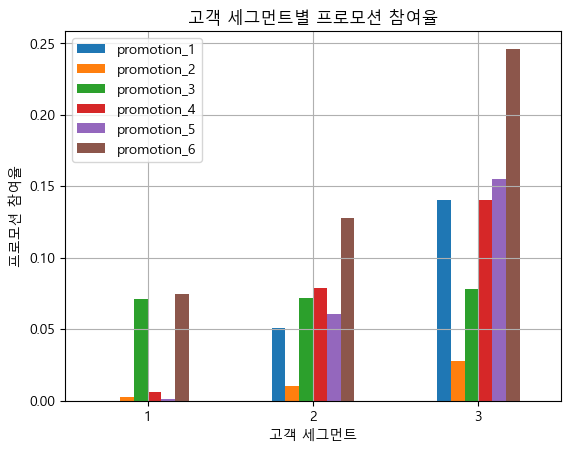

In [68]:
avg_promotion.plot(kind='bar', rot=0)
plt.title('고객 세그먼트별 프로모션 참여율')
plt.xlabel('고객 세그먼트')
plt.ylabel('프로모션 참여율')
plt.grid()
plt.show()
# 특히 2번 프로모션의 참여율을 저조한데 문제점을 파악할 필요가 있다.
# 6번은 참여율이 특히 높은데 어떤 점이 참여율을 높였는지 파악할 필요가 있다.

### 세그먼트별 소비 방법 파악

In [69]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

selected_columns = [
    col
    for col in groupby_rfm_segment.columns
    if col.startswith('num_purchase') and col != 'num_purchase_total'
]
selected_columns.append('rfm_segment')
selected_columns

num_sum_per_product = groupby_rfm_segment[selected_columns]
num_sum_per_product = num_sum_per_product.set_index('rfm_segment')
num_sum_per_product

,num_purchase_web,num_purchase_store,num_purchase_discount
rfm_segment,,,
1,1336,2340,1386
2,2738,3529,1585
3,4968,6972,2141


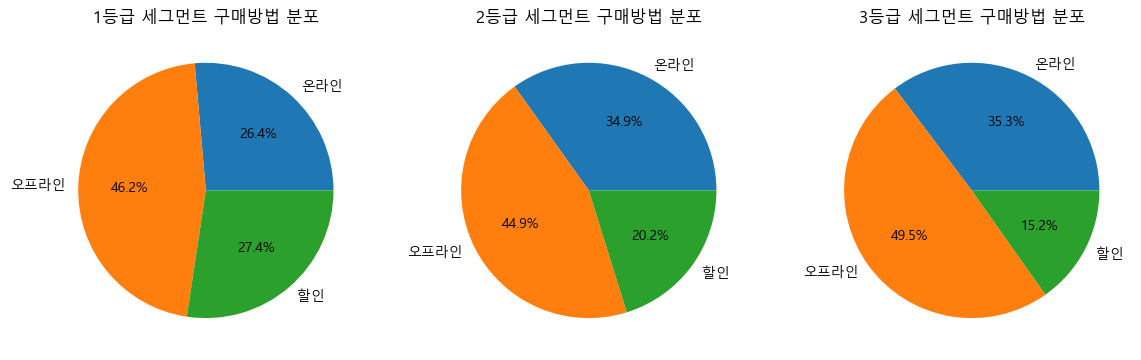

In [70]:
plt.figure(figsize=(14, 6))

for i, i_segment in enumerate(range(1, num_grades + 1), 1):
    plt.subplot(1, 3, i)
    num_sum_per_product.loc[i_segment].plot(
        kind='pie',
        autopct='%.1f%%',
        labels=['온라인', '오프라인', '할인'],
        title=f'{i_segment}등급 세그먼트 구매방법 분포',
        ylabel='',
    )
# 등급이 낮을수록 할인을 통해 구매한다.

### 세그먼트별 연소득 분포

In [71]:
# amount_total 만원 단위로 바꾸기
df['amount_total(만원)'] = df['amount_total']/10000

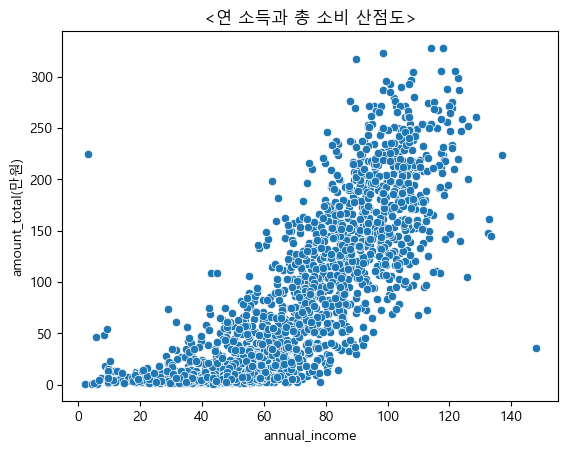

In [72]:
temp_df = df.drop(df[df['annual_income'] >= 800].index)
sns.scatterplot(data=temp_df, x='annual_income', y='amount_total(만원)')
plt.title('<연 소득과 총 소비 산점도>')
plt.show()

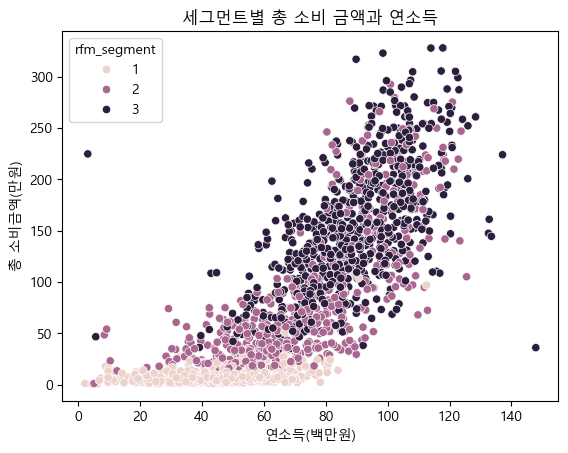

In [77]:
sns.scatterplot(data=temp_df, x='annual_income', y='amount_total(만원)', hue='rfm_segment')
plt.title("세그먼트별 총 소비 금액과 연소득")
plt.ylabel('총 소비금액(만원)')
plt. xlabel('연소득(백만원)')
plt.show()
# 등급이 높을수록 연소득이 높은 쪽에 많이 분포한다.